In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(20,5),'axes.facecolor':'white', 'figure.facecolor':'white',})
sns.set_palette("magma")
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

In [89]:
def get_x_y(df):
    wind_x = df[df.capacity_f.notna()].iloc[:,13:].dropna()
    wind_y = df.loc[wind_x.index,'capacity_f']
    solar_x = df[df.pv_capacit.notna()].iloc[:,13:].dropna()
    solar_y = df.loc[solar_x.index,'pv_capacit']
    wind_df = df.iloc[wind_x.index,:]
    solar_df = df.iloc[solar_x.index,:]
    return wind_x, wind_y, solar_x, solar_y, wind_df, solar_df

In [94]:
files = ['ssp2_10_41','ssp2_41_70','ssp5_11_40','ssp5_41_70','normal']
dfs = []
for file in files:
  dfs.append(pd.read_csv(f'{file}.csv'))

### Solar

In [96]:
wind_x, wind_y, solar_x, solar_y, wind_df, solar_df = get_x_y(dfs[-1])
from sklearn.linear_model import Ridge

ridge = Ridge().fit(solar_x,solar_y)
initial_y = ridge.predict(solar_x)
print('Coefficient per X variable for Ridge')
print(pd.DataFrame(solar_x.columns,ridge.coef_))
print(f'lr intercept: {round(ridge.intercept_,5)}')
print('---------------------------------------')
print(f'Ridge train accuracy score: {round(ridge.score(solar_x,solar_y),5)}')
print(f'Ridge test accuracy score: {round(ridge.score(solar_x,solar_y),5)}')

Coefficient per X variable for Ridge
                 0
 0.000018     dd_0
-0.000018    dd_18
-0.000050      AHM
-0.000259     nffd
-0.002780      emt
 0.000192      ffp
 0.002611      mar
-0.000134   ppt_at
-0.000048   ppt_sp
 0.000008      shm
-0.000245  tave_sp
 0.000619     MWMT
-0.000076      msp
 0.000082     eref
 0.000192      ext
 0.000087      mat
-0.000007   ppt_sm
 0.000616       rh
 0.000355  tave_sm
-0.000001      pas
-0.000114   ppt_wt
 0.001300  tave_at
-0.000925  tave_wt
-0.000908       td
 0.000709     bffp
 0.000011      cmd
 0.001339     effp
 0.000080     dd18
-0.000080      cmi
-0.000042   dd1040
-0.000031      dd5
 0.001378     mcmt
 0.000099      map
lr intercept: -0.3613
---------------------------------------
Ridge train accuracy score: 0.90161
Ridge test accuracy score: 0.90161


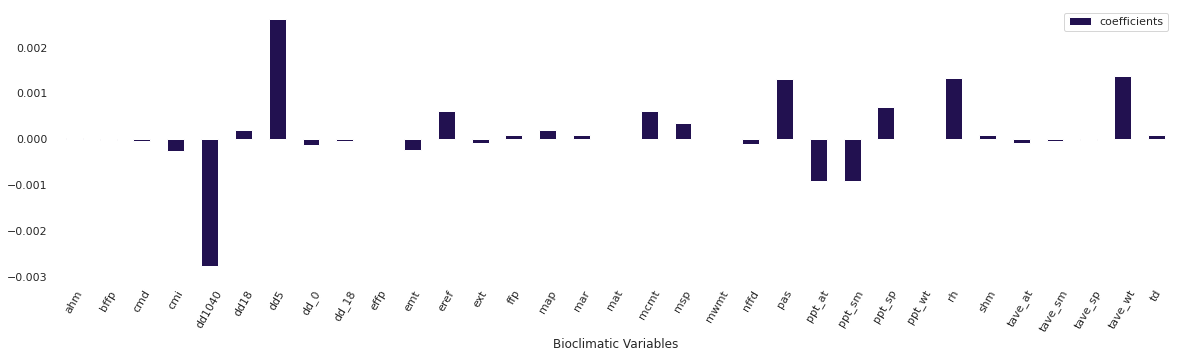

In [107]:
solar_x.columns = [col.lower() for col in solar_x.columns]
pd.DataFrame(solar_x.sort_index(axis=1).columns,ridge.coef_).reset_index().rename({0:'Bioclimatic Variables','index':'coefficients'},axis=1).set_index('Bioclimatic Variables').plot(kind='bar')
plt.xticks(rotation=60)
plt.savefig('ridge_results.png',bbox_inches='tight')
# Solar Plot locally dd1040,dd5,pas,tave_wt,th

In [116]:
def pca(x,y):
    from sklearn.decomposition import PCA
    pcan = PCA(2).fit(x)
    pca = PCA(n_components=pcan.n_components_)
    X = pca.fit_transform(x)
    ratio = pca.explained_variance_ratio_
    pca_loadings = pd.DataFrame(pca.components_.T,index=x.columns)
    return X,pca_loadings
solar_x.columns = [col.lower() for col in solar_x.columns]
solar_x = solar_x.sort_index()
solar_normal_x, normal_loadings = pca(solar_x, solar_y)

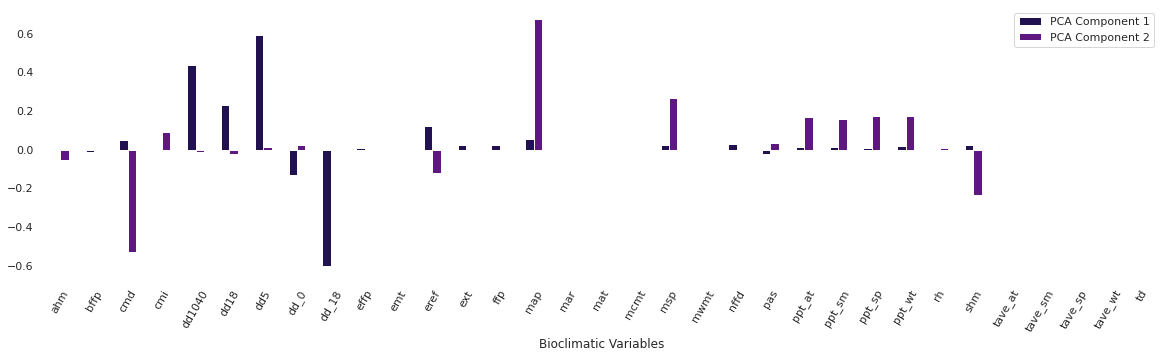

In [121]:
normal_loadings.reset_index().rename({0:'PCA Component 1',1:'PCA Component 2','index':'Bioclimatic Variables'},axis=1).set_index('Bioclimatic Variables').sort_index().plot(kind='bar')
plt.xticks(rotation=60)
plt.savefig('solarpca_results.png',bbox_inches='tight')

### Wind

In [108]:
wind_x, wind_y, solar_x, solar_y, wind_df, solar_df = get_x_y(dfs[-1])
from sklearn.linear_model import Ridge

ridge = Ridge().fit(wind_x,wind_y)
initial_y = ridge.predict(wind_x)
print('Coefficient per X variable for Ridge')
print(pd.DataFrame(solar_x.columns,ridge.coef_))
print(f'lr intercept: {round(ridge.intercept_,5)}')
print('---------------------------------------')
print(f'Ridge train accuracy score: {round(ridge.score(wind_x,wind_y),5)}')
print(f'Ridge test accuracy score: {round(ridge.score(wind_x,wind_y),5)}')

Coefficient per X variable for Ridge
                 0
 0.000064     dd_0
-0.000014    dd_18
-0.000383      AHM
 0.001255     nffd
-0.001671      emt
 0.000033      ffp
-0.006581      mar
-0.000521   ppt_at
 0.000075   ppt_sp
-0.000035      shm
-0.012492  tave_sp
 0.005854     MWMT
 0.001059      msp
 0.000091     eref
 0.000033      ext
-0.002462      mat
-0.000676   ppt_sm
-0.003975       rh
 0.017275  tave_sm
-0.000055      pas
-0.000448   ppt_wt
 0.004490  tave_at
-0.014228  tave_wt
-0.003820       td
 0.001055     bffp
 0.000617      cmd
 0.001748     effp
 0.000447     dd18
 0.007811      cmi
-0.000544   dd1040
 0.000236      dd5
 0.009658     mcmt
-0.000539      map
lr intercept: -0.45376
---------------------------------------
Ridge train accuracy score: 0.61087
Ridge test accuracy score: 0.61087


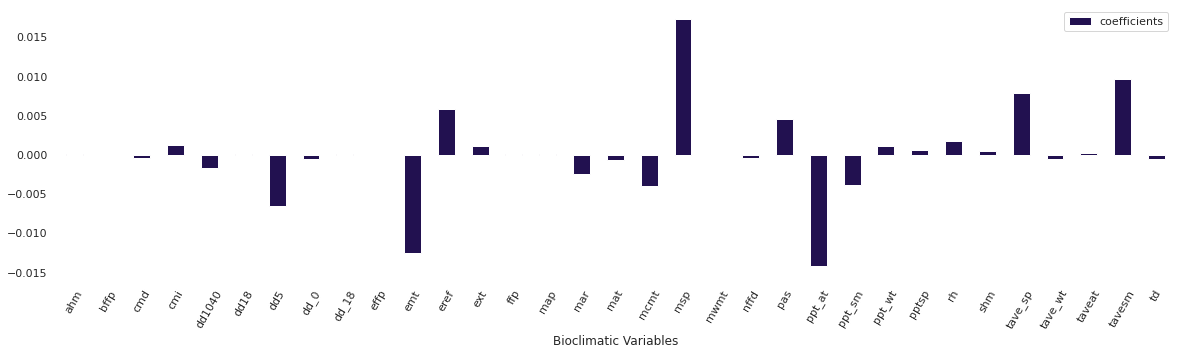

In [126]:
wind_x.columns = [col.lower() for col in wind_x.columns]
pd.DataFrame(wind_x.sort_index(axis=1).columns,ridge.coef_).reset_index().rename({0:'Bioclimatic Variables','index':'coefficients'},axis=1).set_index('Bioclimatic Variables').plot(kind='bar')
plt.xticks(rotation=60)
plt.savefig('wind_ridge_results.png',bbox_inches='tight')
# Wind Plot locally emt, msp,ppt_at,tave_sp,tave_sm

In [ ]:
# I will plot the distributions of top variables locally which is separate from the google collab notebook
# Solar:
dd5, dd1040,dd_18cmd,shm,map,msp

# Post Modelling: Outcome Plots based on State

In [ ]:
solar_list = []
wind_list = []
for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
      if not 'model' in file:
        if file.startswith('solar'):
            solar_list.append(pd.read_csv(os.getcwd()+'/'+file).add_prefix(f"{file.split('.')[0]}_").rename({f"{file.split('.')[0]}_NAME":'State'},axis=1).set_index('State'))
        if file.startswith('wind'):
            wind_list.append(pd.read_csv(os.getcwd()+'/'+file).add_prefix(f"{file.split('.')[0]}_").rename({f"{file.split('.')[0]}_NAME":'State'},axis=1).set_index('State'))
            # print(file.split('.')[0])

In [63]:
solar = solar_list[0].join(solar_list[1]).join(solar_list[2]).join(solar_list[3]).join(solar_list[4])
wind = wind_list[0].join(wind_list[1]).join(wind_list[2]).join(wind_list[3]).join(wind_list[4])
solar_mean_col = [col for col in solar.columns if 'mean' in col]
wind_mean_col = [col for col in wind.columns if 'mean' in col]

In [64]:
solar['SSP5-8.5 Years 41-70 vs Current PV Capacity Factor'] = solar['solar_ssp5_41_70_PV Capacity Factor_mean'] - solar['solar_normal_PV Capacity Factor_mean']
solar['SSP2-4.5 Years 41-70 vs Current PV Capacity Factor'] = solar['solar_ssp2_41_70_PV Capacity Factor_mean'] - solar['solar_normal_PV Capacity Factor_mean']

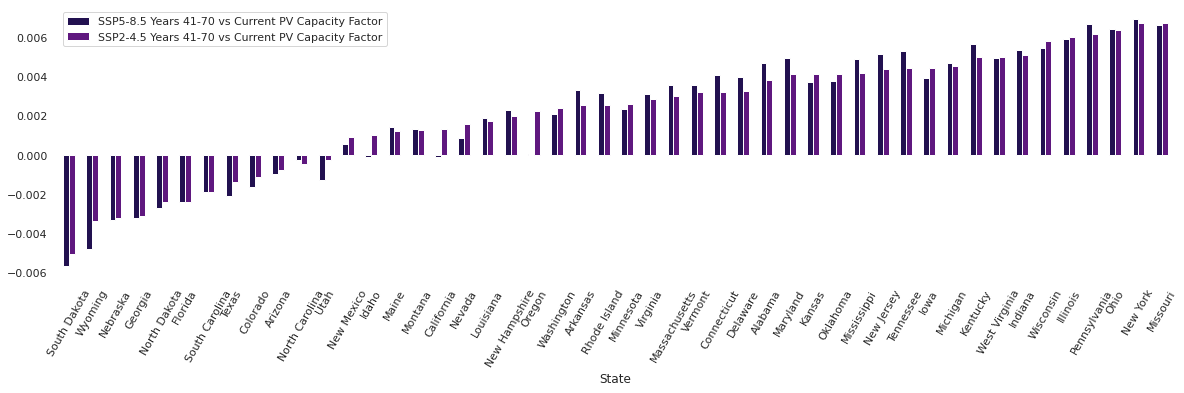

In [86]:
solar[['SSP5-8.5 Years 41-70 vs Current PV Capacity Factor','SSP2-4.5 Years 41-70 vs Current PV Capacity Factor']].sort_values('SSP2-4.5 Years 41-70 vs Current PV Capacity Factor').dropna().plot(kind='bar')
plt.xticks(rotation=60)

plt.savefig('pv_cap_dif.png',bbox_inches='tight')
# plt.savefig('pv_cap_dif.png')

In [66]:
wind['SSP5-8.5 Years 41-70 vs Current Wind Capacity Factor'] = wind['wind_5_41_70_Wind Capacity Factor_mean'] - wind['wind_normal_capacity_f_mean']
wind['SSP2-4.5 Years 41-70 vs Current Wind Capacity Factor'] = wind['wind_ssp2_41_70_Wind Capacity Factor_mean'] - wind['wind_normal_capacity_f_mean']

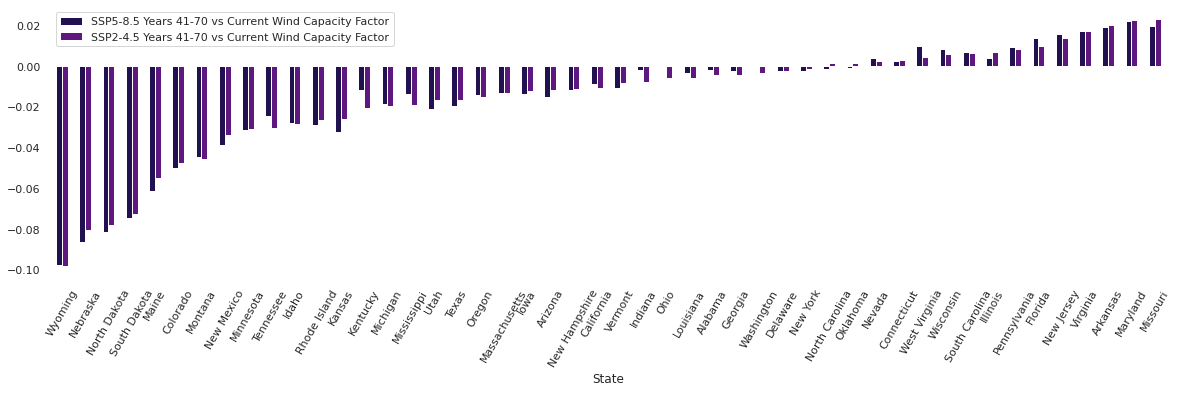

In [85]:
wind[['SSP5-8.5 Years 41-70 vs Current Wind Capacity Factor','SSP2-4.5 Years 41-70 vs Current Wind Capacity Factor']].sort_values('SSP2-4.5 Years 41-70 vs Current Wind Capacity Factor').dropna().plot(kind='bar')
plt.xticks(rotation=60)

plt.savefig('wind_cap_dif.png',bbox_inches='tight')


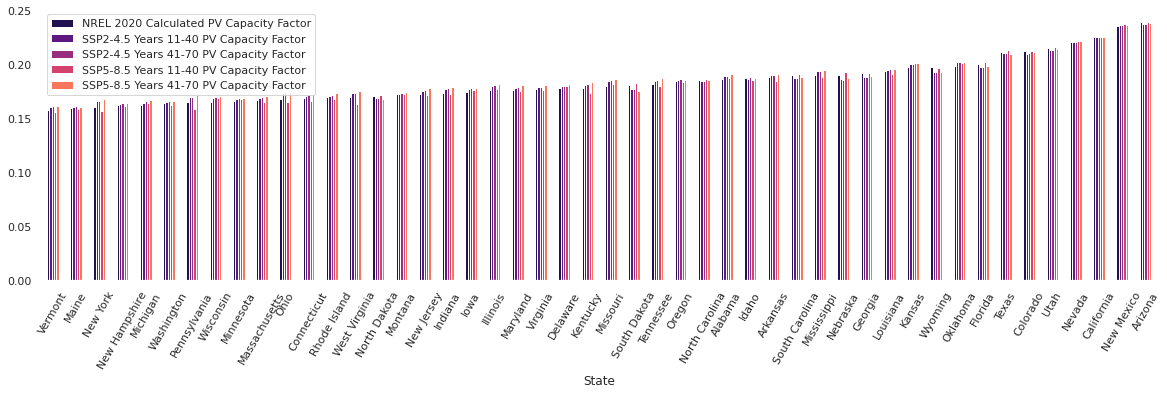

In [84]:
ss = solar[solar_mean_col]
ss = ss.rename({solar_mean_col[0]: 'SSP2-4.5 Years 11-40 PV Capacity Factor',
           solar_mean_col[1]: 'SSP5-8.5 Years 11-40 PV Capacity Factor',
           solar_mean_col[2]: 'NREL 2020 Calculated PV Capacity Factor',
           solar_mean_col[4]: 'SSP5-8.5 Years 41-70 PV Capacity Factor',
           solar_mean_col[5]: 'SSP2-4.5 Years 41-70 PV Capacity Factor',
           },axis=1).drop(solar_mean_col[3],axis=1)
ss = ss[['NREL 2020 Calculated PV Capacity Factor',
   'SSP2-4.5 Years 11-40 PV Capacity Factor',
    'SSP2-4.5 Years 41-70 PV Capacity Factor',
   'SSP5-8.5 Years 11-40 PV Capacity Factor',
    'SSP5-8.5 Years 41-70 PV Capacity Factor',
    ]]
ss.sort_values('NREL 2020 Calculated PV Capacity Factor',).dropna().plot(kind='bar')
plt.xticks(rotation=60)

plt.savefig('solar_caps.png',bbox_inches='tight')


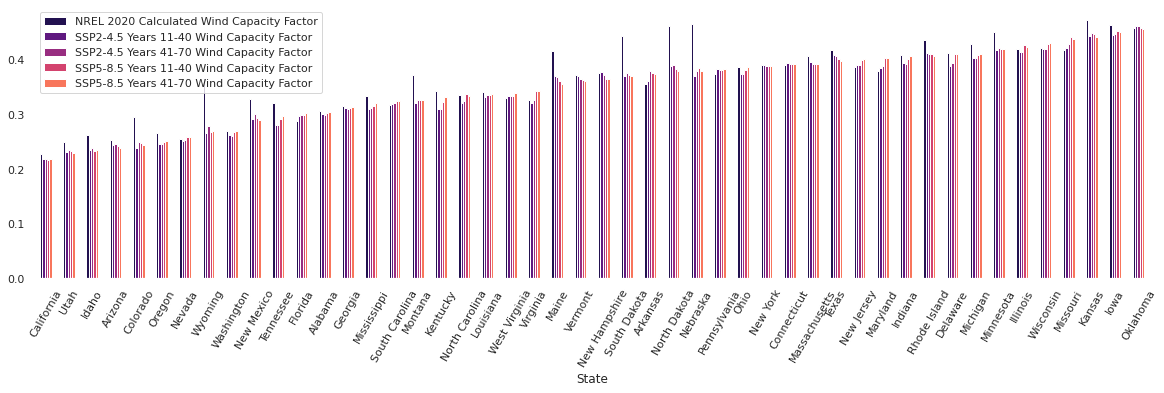

In [83]:
ss = wind[wind_mean_col]
ss = ss.rename({wind_mean_col[0]:'NREL 2020 Calculated Wind Capacity Factor',
           wind_mean_col[2]: 'SSP5-8.5 Years 41-70 Wind Capacity Factor',
           wind_mean_col[3]: 'SSP2-4.5 Years 41-70 Wind Capacity Factor',
           wind_mean_col[4]: 'SSP5-8.5 Years 11-40 Wind Capacity Factor',
           wind_mean_col[5]: 'SSP2-4.5 Years 11-40 Wind Capacity Factor',
           },axis=1).drop(wind_mean_col[1],axis=1)
ss = ss[['NREL 2020 Calculated Wind Capacity Factor',
   'SSP2-4.5 Years 11-40 Wind Capacity Factor',
    'SSP2-4.5 Years 41-70 Wind Capacity Factor',
   'SSP5-8.5 Years 11-40 Wind Capacity Factor',
    'SSP5-8.5 Years 41-70 Wind Capacity Factor',
    ]]
ss.sort_values('SSP5-8.5 Years 41-70 Wind Capacity Factor',).dropna().plot(kind='bar')
plt.xticks(rotation=60)

plt.savefig('wind_caps.png',bbox_inches='tight')

# Outcome Boxplots

In [70]:

solar_model = []
wind_model = []
df_names = ['ssp2_10_40','ssp2_41_70','ssp5_10_40','ssp5_41_70','normal']
for df_name in df_names:
  df = pd.read_csv(f'wind_{df_name}_model4_2_outcome.csv')
  if df_name == 'ssp2_10_40':
    df['Scenario'] = 'SSP2-4.5 Years 11-40 Wind Capacity Factor'
  elif df_name == 'ssp2_41_70':
    df['Scenario'] = 'SSP2-4.5 Years 41-70 Wind Capacity Factor'
  elif df_name == 'ssp5_10_40':
    df['Scenario'] = 'SSP5-8.5 Years 11-40 Wind Capacity Factor'
  elif df_name == 'ssp5_41_70':
    df['Scenario'] = 'SSP5-8.5 Years 41-70 Wind Capacity Factor'
  elif df_name == 'normal':
    df['Scenario'] = 'Predicted 2020 Wind Capacity Factor'
  wind_model.append(df)
  df = pd.read_csv(f'{df_name}_model4_2_outcome.csv')
  if df_name == 'ssp2_10_40':
    df['Scenario'] = 'SSP2-4.5 Years 11-40 PV Capacity Factor'
  elif df_name == 'ssp2_41_70':
    df['Scenario'] = 'SSP2-4.5 Years 41-70 PV Capacity Factor'
  elif df_name == 'ssp5_10_40':
    df['Scenario'] = 'SSP5-8.5 Years 11-40 PV Capacity Factor'
  elif df_name == 'ssp5_41_70':
    df['Scenario'] = 'SSP5-8.5 Years 41-70 PV Capacity Factor'
  elif df_name == 'normal':
    df['Scenario'] = 'Predicted 2020 PV Capacity Factor'
  solar_model.append(df)

In [71]:
sol_actual = pd.DataFrame(solar_model[4].pv_capacit).rename({'pv_capacit':'PV Capacity Factor'},axis=1)
sol_actual['Scenario'] = 'NREL 2020 Calculated PV Capacity Factor'
wind_actual = pd.DataFrame(wind_model[4].capacity_f).rename({'capacity_f':'Wind Capacity Factor'},axis=1)
wind_actual['Scenario'] = 'NREL 2020 Calculated Wind Capacity Factor'

In [72]:
solar_boxplot_df = pd.concat([pd.concat(solar_model),sol_actual])[['PV Capacity Factor','Scenario']]
wind_boxplot_df = pd.concat([pd.concat(wind_model),wind_actual])[['Wind Capacity Factor','Scenario']]

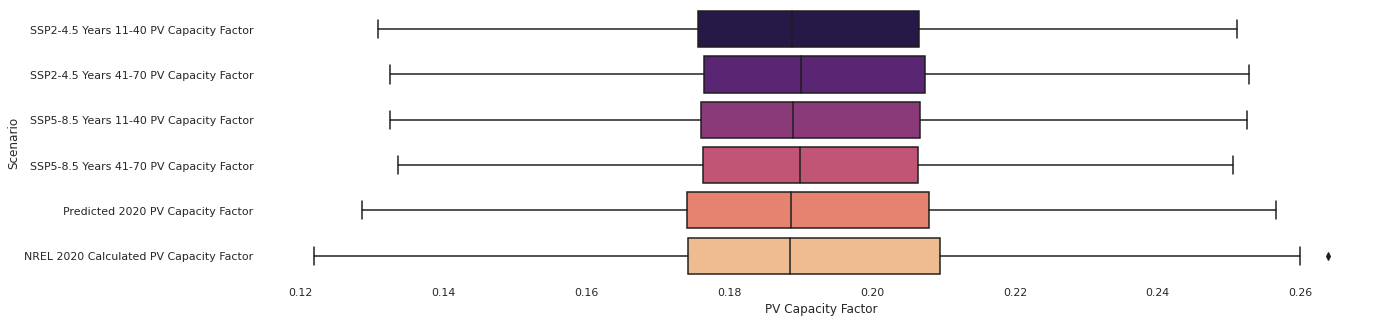

In [80]:
sns.boxplot(data=solar_boxplot_df, x='PV Capacity Factor', y='Scenario')
plt.autoscale()
plt.savefig('solar_outcomes_boxplot.png',bbox_inches='tight')


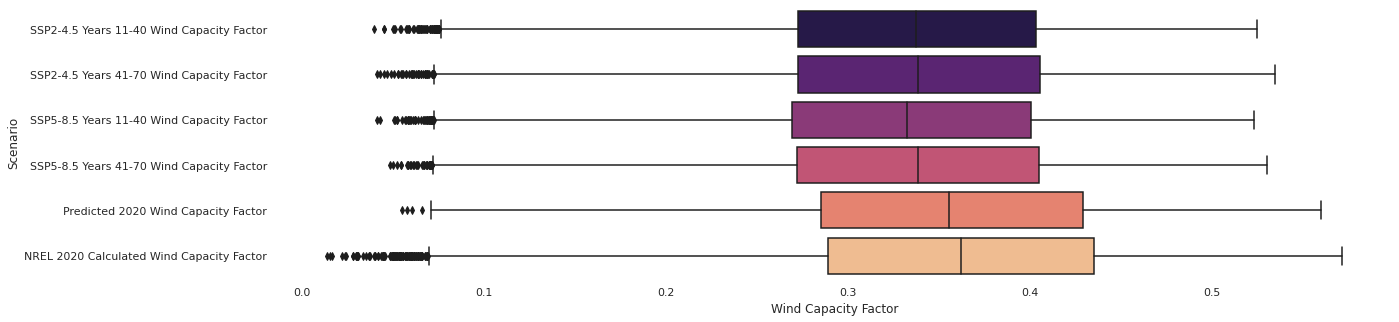

In [79]:
sns.boxplot(data=wind_boxplot_df, x='Wind Capacity Factor', y='Scenario')
plt.autoscale()
plt.savefig('wind_outcomes_boxplot.png',bbox_inches='tight')